In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [3]:
test_data = keras.utils.image_dataset_from_directory(
directory='/kaggle/input/sports-classification/test',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 500 files belonging to 100 classes.


In [4]:
train_data = keras.utils.image_dataset_from_directory(
directory='/kaggle/input/sports-classification/train',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
train_data

Found 13492 files belonging to 100 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
valid_data = keras.utils.image_dataset_from_directory(
directory='/kaggle/input/sports-classification/valid',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

len(valid_data)

Found 500 files belonging to 100 classes.


16

In [6]:

def process(image,label):
    image = tf.cast(image/255.0,tf.float32)

    return image,label
train_data = train_data.map(process)
test_data = test_data.map(process)
valid_data = valid_data.map(process)

In [7]:
print(valid_data)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
#create CNN Arch

In [32]:
model = Sequential()
model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(256 ,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(256,activation='relu',bias_regularizer='l1' ))
model.add(Dropout(rate  = 0.1))
model.add(Dense(180,activation='relu',bias_regularizer='l1'))
model.add(Dropout(rate = 0.1))

model.add(Dense(100,activation = 'softmax'))

model.summary()





Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │   268,435,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 180)            │        46,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        18,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,097,320 (1.00 GB)

 Trainable params: 269,097,320 (1.00 GB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer = 'rmsprop',loss='SparseCategoricalCrossentropy',metrics = ['accuracy'])

In [34]:
history = model.fit(train_data,epochs = 10,validation_data =valid_data)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 108s 207ms/step - accuracy: 0.0253 - loss: 6.3571 - val_accuracy: 0.1160 - val_loss: 3.7758
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 170ms/step - accuracy: 0.1267 - loss: 3.7101 - val_accuracy: 0.2620 - val_loss: 2.9422
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 170ms/step - accuracy: 0.3005 - loss: 2.8093 - val_accuracy: 0.3200 - val_loss: 2.8507
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 170ms/step - accuracy: 0.5461 - loss: 1.7106 - val_accuracy: 0.3120 - val_loss: 3.4220
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 170ms/step - accuracy: 0.7628 - loss: 0.8692 - val_accuracy: 0.2600 - val_loss: 5.0391
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 170ms/step - accuracy: 0.8628 - loss: 0.4877 - val_accuracy: 0.2940 - val_loss: 4.7508
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 170ms/step - accuracy: 0.9142 - loss: 0.3167 - val_accuracy: 0.3040 - val_loss: 5.5399
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 72s 170ms/step - accuracy: 0.9316 - loss: 

In [35]:
from keras.preprocessing import image
import numpy as np
img_path = '/kaggle/input/sports-classification/test/ampute football/2.jpg'  
img = image.load_img(img_path, target_size=(256,256))  # Set height and width according to your model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  

In [24]:
import os
list_of_labels= []
path = '/kaggle/input/sports-classification/test'

list_of_labels.extend(os.listdir(path))
list_of_labels = sorted(list_of_labels)
list_of_labels





['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'axe throwing',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'baton twirling',
 'bike polo',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'bungee jumping',
 'canoe slamon',
 'cheerleading',
 'chuckwagon racing',
 'cricket',
 'croquet',
 'curling',
 'disc golf',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'fly fishing',
 'football',
 'formula 1 racing',
 'frisbee',
 'gaga',
 'giant slalom',
 'golf',
 'hammer throw',
 'hang gliding',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'horseshoe pitching',
 'hurdles',
 'hydroplane racing',
 'ice climbing',
 'ice yachting',
 'jai alai',
 'javelin',
 'jousting',
 'judo',
 'lacrosse',
 'log rolling',
 'luge',
 'motorcycle racing',
 'mushing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole climbing',
 'pole dancing',
 'pole vau

In [36]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
list_of_labels[predicted_class[0]]



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


'tennis'

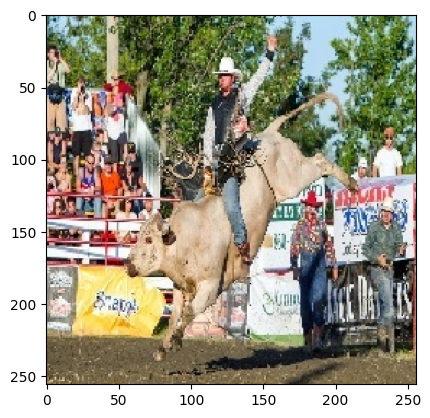

In [26]:
import matplotlib.pyplot as plt
plt.imshow(img_array[0])

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']


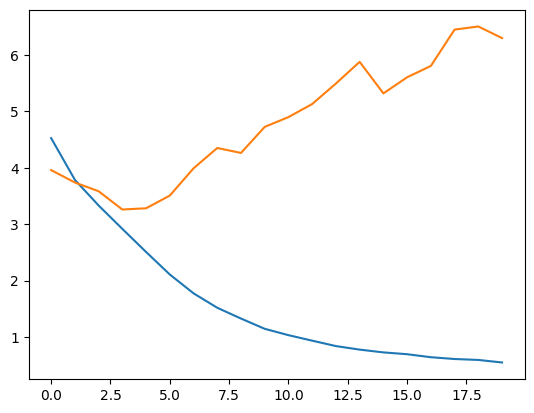

In [19]:
plt.plot(loss)
plt.plot(val_loss)